In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 1000)

In [2]:
import warnings
warnings.filterwarnings('ignore')
# to avoid lots of INFO
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

# NN - algorithm calculation - back propagation

- key word: chain rule

- ## [李宏毅老師 - 教學網站](https://speech.ee.ntu.edu.tw/~hylee/index.php)

- [Book_李宏毅老師機器學習課程筆記](https://hackmd.io/@shaoeChen/B1CoXxvmm/https%3A%2F%2Fhackmd.io%2Fs%2Fr1cqatmI7)


In [ ]:
# $\begin{matrix}
#         \min_{\mathbf{w},b}\mathbf{w}^T\mathbf{w}+C\sum_{i=1}^{n}\xi _{i}         \\ 
#         s.t. \ \forall i \ y_{i}(\mathbf{w}^T\mathbf{x}_{i}+b)\geq 1-\xi_i         \\ 
#          \forall i \ \xi_i \geq 0        
# \end{matrix}$

In [ ]:
# Loss function = sum of all distances between $\begin{matrix}
#                 y^n and \hat{y}^n \\
#                 \\
#                 L(\theta) = \sum_{i=1}^{N} C^n (\theta)  \\
#                 \end{matrix}$

- ## scope

> <font color='red'>input, weights, output, loss (cost)</font>

- network parameters ${\theta} = \{{w}_{1}, {w}_{2}, ..., {b}_{1}, {b}_{2}, ...\}$

> ${x}^{N}$  ->  NN $\theta$  ->  ${y}^n$  <--- COST FUNCTION $C^n$ --->  $\hat{y}^n$

> $\begin{matrix} 
{x}^{N}  ->  NN \theta  ->  {y}^n  <--- COST FUNCTION: C^n --->  \hat{y}^n 
\end{matrix}$

> ${x}^{N}$  ->  NN $\theta$  ->  ${y}^n$  <--- COST FUNCTION $C^n$ --->  $\hat{y}^n$



---



- ## Loss Function

    - ### gradient descent

    - ### starting parameters: ${\theta}^{0}$ -> ${\theta}^{1}$ -> ${\theta}^{2}$ -> ...

    - ### compute ${\nabla L({\theta}^{0})}$ => ${\theta}^{1}$ = ${\theta}^{0}$ - <font color='red'>$\eta$</font> ${\nabla L({\theta}^{0})}$
      > <font color='red'>$\eta$: learning rate</font>
      
      > <div>
            <img src='https://ithelp.ithome.com.tw/upload/images/20181022/20112540nxqsGC4zYd.png' width=500/>
        </div> 

- [學習率對梯度下降的影響: 如果學習率太小，代表對神經網絡進行非常小的權重更新，會使其訓練變非常緩慢；然後學習率太大，可能導致無法收斂。](https://ithelp.ithome.com.tw/articles/10204032)

- <font color='red'>Loss Function = From training data, sum of all distances between $\begin{matrix}
                y^n and \hat{y}^n \end{matrix}$</font>
> calculation: $\begin{matrix} L(\theta) = \sum_{i=1}^{N} C^n (\theta) \end{matrix}$


- to simplify the question, we can first calculate only for one row of training data
> $\frac{\partial L(\theta)}{\partial w} = \sum_{i=1}^{N} \frac{\partial C^n(\theta)}{\partial w}$
  - then we can sum over all of the training data to get the total loss function $L(\theta)$

<table>
    <tr>
        <td>
            <img src='https://i.imgur.com/vNiLrVP.png' width='500'/>
            <p style="text-align: center; color: red;">Loss Function = From training data, sum of all distances between $\begin{matrix}
                y^n and \hat{y}^n \end{matrix}$
            </p>
            <p style="text-align: center; color: red;">i.e., $\begin{matrix} L(\theta) = \sum_{i=1}^{N} C^n (\theta) \end{matrix}$
            </p>
        </td>
</table>

- ### $\frac{\partial C}{\partial w}$ = <font color='#5cc3b3'>$(\frac{\partial z}{\partial w})$</font> * <font color='#9999ff'>$(\frac{\partial C}{\partial z})$</font>

> ### <font color='#5cc3b3'>$(\frac{\partial z}{\partial w})$</font> is a <font color='#5cc3b3'>forward pass</font>, we need to compute $(\frac{\partial z}{\partial w})$ for all parameters (上百萬、上千萬維的 vector)

> ### <font color='#9999ff'>$(\frac{\partial C}{\partial z})$</font> is a <font color='#9999ff'>backward pass</font>, we need to compute $(\frac{\partial C}{\partial z})$ for all activation function inputs $z$

---

- ## forward pass

- <font color='red'>forward pass 的規律即是，input 是什麼，微分之後就是什麼</font>
  
  - <font color='red'>$
    \frac{\partial z}{\partial w}$
    
    = $\partial$ (an activation function)/$\partial$ (a weight)
    
    = the value of the input connected by the weight</font>

  > $\frac{\partial z}{\partial {w}_{1}} = {x}_{1}$
  
  > $\frac{\partial z}{\partial {w}_{2}} = {x}_{2}$


<table>
    <tr>
        <td>
            <img src='https://i.imgur.com/87cB7vg.png' width='500'/>
            <p style="text-align: center;">forward pass 的規律即是，input 是什麼，微分之後就是什麼，即上層的 output 為下層的 ∂z/∂w
                
如上圖範例所示，輸入是 1 與 -1，其值為各自 ∂z/∂w 的偏微分，以此類推。</p>
        </td>
</table>



---



- ## backward pass

> ### <font color='#9999ff'>$(\frac{\partial C}{\partial z})$</font> is a <font color='#9999ff'>backward pass</font>, we need to compute $(\frac{\partial C}{\partial z})$ for all activation function inputs $z$

> ### <font color='#9999ff'>$\frac{\partial C}{\partial z}$</font> 

  > = <font color=green>[$(\frac{\partial a}{\partial z})$]</font> * <font color=blue>[$(\frac{\partial C}{\partial a})$]</font>
  
  > = <font color=green>[$\sigma^{\prime}(z)$]</font> * <font color=blue>[$((\frac{\partial {z}^{\prime}}{\partial a}) * (\frac{\partial C}{\partial {z}^{\prime}}))  +  ((\frac{\partial {z}^{\prime\prime}}{\partial a}) * (\frac{\partial C}{\partial {z}^{\prime\prime}}))$]</font>
  
  > = <font color=green>[constant]</font> * <font color=blue>[$(({w}_{3}) * (\frac{\partial C}{\partial {z}^{\prime}}))  +  (({w}_{4}) * (\frac{\partial C}{\partial {z}^{\prime\prime}}))$]</font>

--===============================================
  
  - #### <font color='orange'>$\partial C$</font> relates to your <font color='orange'>cost function</font>, e.g, RMSE, MAE, ...
  
  - #### <font color='#ffbc77'>$a$</font> is your <font color='#ffbc77'>activation function</font> (e.g, <font color='#ffbc77'>Sigmoid</font>), and <font color='green'>$(\partial a/\partial z)$</font> or say <font color='green'>$\sigma^{\prime}(z)$ is a constant (because z is already determined in the forward pass)</font>

<table>
    <tr>
        <td>
            <img src='https://i.imgur.com/XjYoOG7.png' width='500'/>
            <p style="text-align: center;"></p>
        </td>
        <td>
            <img src='https://i.imgur.com/W9A6HFz.png' width='500'/>
            <p style="text-align: center;"></p>
        </td>
        <td>
            <img src='https://i.imgur.com/0GioITt.png' width='500'/>
            <p style="text-align: center;"></p>
        </td>
        <td>
            <img src='https://i.imgur.com/w7B007O.png' width='500'/>
            <p style="text-align: center;"></p>
        </td>
</table>

- 總結來說，反向傳播就是將forward pass 的偏微分跟 backward pass的偏微分相乘即為解。

---

## [Limitations](https://en.m.wikipedia.org/wiki/Backpropagation)

- Gradient descent with backpropagation <font color='red'>is not guaranteed to find the global minimum of the error function</font>, but only a local minimum; also, it has trouble crossing plateaus in the error function landscape. This issue, caused by the non-convexity of error functions in neural networks, was long thought to be a major drawback, but Yann LeCun et al. argue that in many practical problems, it is not.[15]

- Backpropagation learning does not require normalization of input vectors; however, normalization could improve performance.[16]

- Backpropagation requires the derivatives of activation functions to be known at network design time.


<table>
    <tr>
        <td>
            <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Extrema_example.svg/250px-Extrema_example.svg.png' width='300'/>
            <p style="text-align: center;">Gradient descent may find a local minimum instead of the global minimum</p>
        </td>
        
</table>



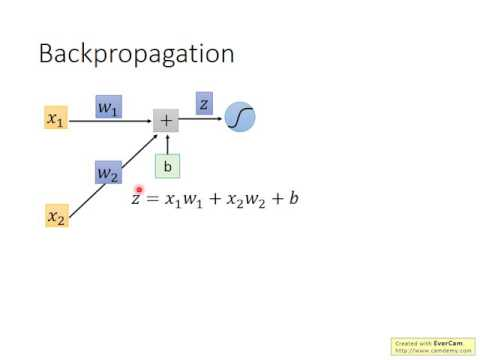

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo("ibJpTrp5mcE", width=360, height=240)

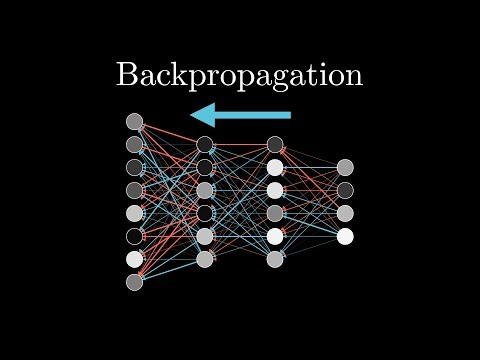

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ilg3gGewQ5U", width=360, height=240)

---

> google: NN hidden layer / embedding layer difference

## [Neural Network Embeddings Explained](https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526)

> <font color='red'>embedding, i.e., vectorization, a method used to represent discrete variables as continuous vectors.</font>


- ### summary: what neural network embeddings are, why we want to use them, and how they are learned

- An embedding is a mapping of a discrete — categorical — variable to a vector of continuous numbers. In the context of neural networks, embeddings are low-dimensional, learned continuous vector representations of discrete variables.


- The embeddings are the parameters, or weights, of the network that are adjusted during training to minimize the loss on the supervised task.


- ### Neural network embeddings have 1 primary purpose:
  > #### vectorize the data (including the categorical data)
  
  > embeddings are vectors
  
  > the backpropagated weights move the points during training process
  
    - first, the data (even the categorical data) are scattered as points randomly to a vector space 
    - the backpropagated weights move the points during training process
    - if the 'similar' categories are placed closer to each other in embedding space, it only means that it is a potential / affiliated benifits from 'well-trained' embeddings, this phonomenon is not always true!


- #### potential / affiliated benifits from 'well-trained' embeddings

  > 1. Finding nearest neighbors in the embedding space. These can be used to make recommendations based on user interests or cluster categories.
  > 2. As input to a machine learning model for a supervised task.
  > 3. For visualization of concepts and relations between categories.

  > <table>
    <tr>
        <td>
            <img src='https://www.tensorflow.org/text/guide/images/embedding2.png' width='400'/>
            <p style="text-align: center;">1. Finding nearest neighbors in the embedding space. These can be used to make recommendations based on user interests or cluster categories.</p>
        </td>
        <td>
            <img src='https://miro.medium.com/max/1400/1*DuaSQL7EiPa-IreCXf2r5w.png' width='400'/>
            <p style="text-align: center;">1. Finding nearest neighbors in the embedding space. These can be used to make recommendations based on user interests or cluster categories.</p>
        </td>
        <td>
            <img src='https://media.arxiv-vanity.com/render-output/4873234/multisource7.jpg' width='500'/>
            <p style="text-align: center;">2. As input to a machine learning model for a supervised task.</p>
        </td>
        <td>
            <img src='https://miro.medium.com/max/2000/1*zAdi7DntawgPsQekPkFxPA.png' width='600'/>
            <p style="text-align: center;">3. For visualization of concepts and relations between categories.</p>
        </td>
</table>



- ### The one-hot encoding technique has two main drawbacks:

> 1. For high-cardinality variables — those with many unique categories — the dimensionality of the transformed vector becomes unmanageable.
> 2. The mapping is completely uninformed: “similar” categories are not placed closer to each other in embedding space.

```
# One Hot Encoding Categoricals
books = ["War and Peace", "Anna Karenina", 
          "The Hitchhiker's Guide to the Galaxy"]
books_encoded = [[1, 0, 0],
                 [0, 1, 0],
                 [0, 0, 1]]
Similarity (dot product) between First and Second = 0
Similarity (dot product) between Second and Third = 0
Similarity (dot product) between First and Third = 0
```

> ### Considering these two problems, the ideal solution for representing categorical variables would require fewer numbers than the number of unique categories and would place similar categories closer to one another.

> - To construct a better representation of categorical entities, we can use an embedding neural network and a supervised task to learn embeddings.

```
# Idealized Representation of Embedding
books = ["War and Peace", "Anna Karenina", 
          "The Hitchhiker's Guide to the Galaxy"]
books_encoded_ideal = [[0.53,  0.85],
                       [0.60,  0.80],
                       [-0.78, -0.62]]
Similarity (dot product) between First and Second = 0.99
Similarity (dot product) between Second and Third = -0.94
Similarity (dot product) between First and Third = -0.97

```

- ### Conclusions

> Neural network embeddings are learned low-dimensional representations of discrete data as continuous vectors. These embeddings overcome the limitations of traditional encoding methods and can be used for purposes such as finding nearest neighbors, input into another model, and visualizations.

- Embeddings are an effective tool for handling discrete variables and present a useful application of deep learning.


--



## [Hidden Layers and Machine Learning](https://deepai.org/machine-learning-glossary-and-terms/hidden-layer-machine-learning#:~:text=In%20neural%20networks%2C%20a%20hidden,inputs%20entered%20into%20the%20network.)

<div>
    <img src='https://images.deepai.org/django-summernote/2019-05-17/a62750ea-2230-4339-b06b-10c3157e2fc5.png' width='400'>
</div>

> ### What is a Hidden Layer?

> In neural networks, a hidden layer is located between the input and output of the algorithm, in which the function applies weights to the inputs and directs them through an activation function as the output. In short, the hidden layers perform nonlinear transformations of the inputs entered into the network. Hidden layers vary depending on the function of the neural network, and similarly, the layers may vary depending on their associated weights.


> Hidden layers are very common in neural networks, however their use and architecture often varies from case to case. As referenced above, hidden layers can be separated by their functional characteristics. For example, in a CNN used for object recognition, a hidden layer that is used to identify wheels cannot solely identify a car, however when placed in conjunction with additional layers used to identify windows, a large metallic body, and headlights, the neural network can then make predictions and identify possible cars within visual data.


## define functions

In [3]:
def print_df_info(df):
    print('df.shape: {}'.format(df.shape))
    print(df.describe())
    df.info()

## read the data

In [4]:
df_train = pd.read_csv('/Users/johnson.huang/py_ds/tutor_python_project/data/titanic/train.csv')
df_test = pd.read_csv('/Users/johnson.huang/py_ds/tutor_python_project/data/titanic/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print_df_info(df_train)

df.shape: (891, 12)
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries

In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print_df_info(df_test)

df.shape: (418, 11)
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int6

---

# base line model - wide and deep

## package installation


- [pytorch official](https://pytorch.org/get-started/locally/)

> ### gpu version
>  #### - specify your environment: Stable (1.10.1), Linux, Pip, Python, CUDA 11.3
>  - pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

> ### cpu version
>  #### - specify your environment: Stable (1.10.1), Mac, Pip, Python, CPU
>  - pip3 install torch torchvision torchaudio



- pip3 install pytorch-widedeep
- [optional]
    - sudo apt install python3-pip
    - sudo apt install net-tools
    - sudo apt install -y build-essential libssl-dev libffi-dev python3-dev
    - sudo apt install curl
    - sudo apt install libgl1-mesa-glx libegl1-mesa libxrandr2 libxrandr2 libxss1 libxcursor1 libxcomposite1 libasound2 libxi6 libxtst6
    - sudo apt install openjdk-8-jre-headless
    - pip3 install torch torchvision
    - pip3 install xgboost
    - pip3 install geopandas
    - pip3 install scikit-learn
    - pip3 install pandas
    - pip3 install statsmodels
    - pip3 install python-geohash
    - pip3 install jupyter
    - pip3 install pytorch-widedeep

## check environment

In [9]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# How to check if pytorch is using the GPU?
# https://stackoverflow.com/questions/48152674/how-to-check-if-pytorch-is-using-the-gpu

import torch

print('torch.cuda.is_available():', torch.cuda.is_available())
# >>> True

if torch.cuda.is_available():
    torch.cuda.current_device()
    print('torch.cuda.current_device():', torch.cuda.current_device())
    # >>> 0

    torch.cuda.device(0)
    print('torch.cuda.device(0):', torch.cuda.device(0))
    # >>> <torch.cuda.device at 0x7efce0b03be0>

    torch.cuda.device_count()
    print('torch.cuda.device_count():', torch.cuda.device_count())
    # >>> 1

    torch.cuda.get_device_name(0)
    print('torch.cuda.get_device_name(0):', torch.cuda.get_device_name(0))


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')


torch.cuda.is_available(): False
Using device: cpu



### paper
- https://arxiv.org/pdf/1606.07792.pdf

### sample code reference - pytorch implementation
- https://github.com/jrzaurin/pytorch-widedeep
<!-- ![wide_n_deep_structure](https://github.com/jrzaurin/pytorch-widedeep/raw/master/docs/figures/widedeep_arch.png) -->
<div>
<img src="https://github.com/jrzaurin/pytorch-widedeep/raw/master/docs/figures/widedeep_arch.png" width="700"/>
</div>
<!-- ![formula](https://github.com/jrzaurin/pytorch-widedeep/raw/master/docs/figures/architecture_2_math.png) -->
<div>
<img src="https://github.com/jrzaurin/pytorch-widedeep/raw/master/docs/figures/architecture_2_math.png" width="700"/>
</div>

### dataset reference
- https://datahub.io/machine-learning/adult#resource-adult_zip
- need to adjust some of the column names

### pytorch version to pip install
- https://pytorch.org/get-started/locally/

> specify your environment: Stable (1.10.1), Linux, Pip, Python, CUDA 11.3

> pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

- reference: https://deepctr-doc.readthedocs.io/en/v0.9.0/Features.html
<!-- ![wide_n_deep_structure_2](https://deepctr-doc.readthedocs.io/en/v0.9.0/_images/WDL.png) -->
<!-- <img src=https://deepctr-doc.readthedocs.io/en/v0.9.0/_images/WDL.png width="900"> -->
<div>
<img src="https://deepctr-doc.readthedocs.io/en/v0.9.0/_images/WDL.png" width="700"/>
</div>

### sample code

In [10]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split

from pytorch_widedeep import Trainer  # cannot import name '_registerMatType' from 'cv2.cv2'
'''error message: cannot import name '_registerMatType' from 'cv2.cv2'

$ pip install opencv-python-headless==4.1.2.30
https://stackoverflow.com/questions/70537488/cannot-import-name-registermattype-from-cv2-cv2
'''
from pytorch_widedeep.preprocessing import WidePreprocessor, TabPreprocessor
from pytorch_widedeep.models import Wide, TabMlp, WideDeep
from pytorch_widedeep.metrics import Accuracy

# the following 4 lines are not directly related to ``pytorch-widedeep``. I
# assume you have downloaded the dataset and place it in a dir called
# data/adult/
df = pd.read_csv('../data/wide_n_deep_test_adult/adult_csv.csv').rename(
    columns={'class': 'income',
             'sex' :'gender',
             'hoursperweek': 'hours-per-week'
            })  # ("data/adult/adult.csv.zip")
df["income_label"] = (df["income"].apply(lambda x: ">50K" in x)).astype(int)
df.drop("income", axis=1, inplace=True)
print('df.isnull().sum():', df.isnull().sum())
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df.income_label)
print('df_train.shape:', df_train.shape)
print(r'''
    df.shape: {s1}
    df_train.shape: {s2}
    df_test.shape: {s3}
    '''.format(
        s1=df.shape,
        s2=df_train.shape,
        s3=df_test.shape
    )
)

# prepare wide, crossed, embedding and continuous columns
wide_cols = [
    "education",
    "relationship",
    "workclass",
    "occupation",
    "native-country",
    "gender",
]
cross_cols = [("education", "occupation"), ("native-country", "occupation")]
embed_cols = [
    ("education", 16),
    ("workclass", 16),
    ("occupation", 16),
    ("native-country", 32),
]
cont_cols = ["age", "hours-per-week"]
target_col = "income_label"

# target
target = df_train[target_col].values

# wide
wide_preprocessor = WidePreprocessor(wide_cols=wide_cols, crossed_cols=cross_cols)
X_wide = wide_preprocessor.fit_transform(df_train)
wide_dim = np.unique(X_wide).shape[0]
print('wide_dim:', wide_dim)
wide = Wide(wide_dim=wide_dim, pred_dim=1)
print('wide:', wide)

# deeptabular
tab_preprocessor = TabPreprocessor(embed_cols=embed_cols, continuous_cols=cont_cols)
X_tab = tab_preprocessor.fit_transform(df_train)
print('len(X_tab):', len(X_tab))
print('tab_preprocessor.embeddings_input:', tab_preprocessor.embeddings_input)
deeptabular = TabMlp(
    mlp_hidden_dims=[64, 32],
    column_idx=tab_preprocessor.column_idx,
    embed_input=tab_preprocessor.embeddings_input,
    continuous_cols=cont_cols,
)
# print('deeptabular:', deeptabular)

# wide and deep
model = WideDeep(wide=wide, deeptabular=deeptabular)
# print('model:', model)

# train the model
trainer = Trainer(model, objective="binary", metrics=[Accuracy])
trainer.fit(
    X_wide=X_wide,
    X_tab=X_tab,
    target=target,
    n_epochs=5,
    batch_size=256,
    val_split=0.1,
)

# predict
X_wide_te = wide_preprocessor.transform(df_test)
X_tab_te = tab_preprocessor.transform(df_test)
preds = trainer.predict(X_wide=X_wide_te, X_tab=X_tab_te)

# Save and load

# Option 1: this will also save training history and lr history if the
# LRHistory callback is used
trainer.save(path="model_weights", save_state_dict=True)

# Option 2: save as any other torch model
os.system('mkdir -p /Users/johnson.huang/py_ds/tutor_python_project/data/wide_n_deep_test_adult/model_weights')
torch.save(model.state_dict(), "/Users/johnson.huang/py_ds/tutor_python_project/data/wide_n_deep_test_adult/model_weights/wd_model.pt")


# From here in advance, Option 1 or 2 are the same. I assume the user has
# prepared the data and defined the new model components:
# 1. Build the model
model_new = WideDeep(wide=wide, deeptabular=deeptabular)
model_new.load_state_dict(torch.load("/Users/johnson.huang/py_ds/tutor_python_project/data/wide_n_deep_test_adult/model_weights/wd_model.pt"))

# 2. Instantiate the trainer
trainer_new = Trainer(
    model_new,
    objective="binary",
)

# 3. Either start the fit or directly predict
preds = trainer_new.predict(X_wide=X_wide, X_tab=X_tab)
preds

df.isnull().sum(): age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
capitalgain          0
capitalloss          0
hours-per-week       0
native-country     857
income_label         0
dtype: int64
df_train.shape: (39073, 15)

    df.shape: (48842, 15)
    df_train.shape: (39073, 15)
    df_test.shape: (9769, 15)
    
wide_dim: 771
wide: Wide(
  (wide_linear): Embedding(772, 1, padding_idx=0)
)
len(X_tab): 39073
tab_preprocessor.embeddings_input: [('education', 16, 16), ('workclass', 9, 16), ('occupation', 15, 16), ('native-country', 42, 32)]


predict: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 153/153 [00:13<00:00, 11.19it/s]


array([0, 0, 0, ..., 0, 0, 0])

In [11]:
len(set(df_train['native-country']))

42

In [12]:
df_train.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hours-per-week,native-country,income_label
44186,0,Private,159879,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,2,United-States,0
2276,3,Private,275361,Assoc-acdm,12,Widowed,Other-service,Own-child,White,Female,0,0,1,United-States,0
22104,1,Private,207668,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,1,United-States,0
31528,3,Private,204397,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,3,United-States,0
27853,2,NaN,204817,9th,5,Never-married,NaN,Own-child,Black,Male,0,0,1,United-States,0


In [13]:
import copy
sample_code_df = pd.DataFrame(columns=df.columns, data=copy.deepcopy(df.values))
sample_code_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hours-per-week,native-country,income_label
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,0
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,0


In [14]:
print('----- wide_cols -----')
for col in wide_cols:
    print('wide_cols: {col}, dtype: {t}'.format(col=col, t=sample_code_df[col].dtype))
print(sample_code_df[wide_cols].head(2).to_markdown(tablefmt='grid'))
print('----- embed_cols -----')
embed_col_names = list()
for col in embed_cols:
    col = col[0]
    embed_col_names.append(col)
    print('embed_cols: {col}, dtype: {t}'.format(col=col, t=sample_code_df[col].dtype))
print(sample_code_df[embed_col_names].head(2).to_markdown(tablefmt='grid'))
print('----- cont_cols -----')
for col in cont_cols:
    print('cont_cols: {col}, dtype: {t}'.format(col=col, t=sample_code_df[col].dtype))
print(sample_code_df[cont_cols].head(2).to_markdown(tablefmt='grid'))
print('----- target_col -----')
print('target_col: {col}, dtype: {t}'.format(col=target_col, t=sample_code_df[target_col].dtype))

----- wide_cols -----
wide_cols: education, dtype: object
wide_cols: relationship, dtype: object
wide_cols: workclass, dtype: object
wide_cols: occupation, dtype: object
wide_cols: native-country, dtype: object
wide_cols: gender, dtype: object
+----+-------------+----------------+------------------+-----------------+------------------+----------+
|    | education   | relationship   | workclass        | occupation      | native-country   | gender   |
+====+=============+================+==================+=================+==================+==========+
|  0 | Bachelors   | Not-in-family  | State-gov        | Adm-clerical    | United-States    | Male     |
+----+-------------+----------------+------------------+-----------------+------------------+----------+
|  1 | Bachelors   | Husband        | Self-emp-not-inc | Exec-managerial | United-States    | Male     |
+----+-------------+----------------+------------------+-----------------+------------------+----------+
----- embed_cols ----

### data type

- [python category string type different](https://pbpython.com/pandas_dtypes_cat.html)

| Pandas dtype | Python type | NumPy type | Usage |
| :------: | :------: | :------: | :------: |
| object | str | string_, unicode_ | Text |
| int64 | int | int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Integer numbers |
| float64 | float | float_, float16, float32, float64 | Floating point numbers |
| bool | bool | bool_ | True/False values |
| datetime64 | NA | datetime64[ns] | Date and time values |
| timedelta[ns] | NA | NA | Differences between two datetimes |
| category | NA | NA | Finite list of text values |

## run the code

In [15]:
import numpy as np
import torch
import pandas as pd

from pytorch_widedeep import Trainer
from pytorch_widedeep.optim import RAdam
from pytorch_widedeep.models import (  # noqa: F401
    Wide,
    TabMlp,
    WideDeep,
    TabResnet,
)
from pytorch_widedeep.metrics import Accuracy, Precision, Recall
from pytorch_widedeep.callbacks import (
    History,
    LRHistory,
    EarlyStopping,
    ModelCheckpoint,
)
from pytorch_widedeep.initializers import XavierNormal, KaimingNormal
from pytorch_widedeep.preprocessing import TabPreprocessor, WidePreprocessor

use_cuda = torch.cuda.is_available()

NUM_EPOCHS = 20

if __name__ == "__main__":
    df = pd.read_csv('/Users/johnson.huang/py_ds/tutor_python_project/data/titanic/train.csv')
    print('df.shape:', df.shape, '\n', df.head().to_markdown(tablefmt='grid'))
    print('df.isnull().sum():', df.isnull().sum())
    df.info()
    # basic preprocessing
    df = df.loc[:, ~df.columns.isin(['Cabin'])]
    df = df.dropna(axis=0, how='any')
    df['Age'] = df['Age'].fillna(value=df['Age'].median())
    print('df.shape:', df.shape, '\n', df.head().to_markdown(tablefmt='grid'))
    print('df.isnull().sum():', df.isnull().sum())
    '''
    Data columns (total 12 columns):
     #   Column       Non-Null Count  Dtype  
    ---  ------       --------------  -----  
     0   PassengerId  891 non-null    int64  
     1   Survived     891 non-null    int64  
     2   Pclass       891 non-null    int64  
     3   Name         891 non-null    object 
     4   Sex          891 non-null    object 
     5   Age          714 non-null    float64
     6   SibSp        891 non-null    int64  
     7   Parch        891 non-null    int64  
     8   Ticket       891 non-null    object 
     9   Fare         891 non-null    float64
     10  Cabin        204 non-null    object 
     11  Embarked     889 non-null    object 
    '''
    df = df[['PassengerId', 'Pclass', 'Sex', 'Embarked', 'Ticket', 'Age', 'SibSp', 'Parch', 'Fare', 'Name'] + ['Survived']]
    df = df.astype({'Pclass': 'category', 'Sex': 'category', 'Embarked': 'category', 'Ticket': 'category'})
    # df = df.reset_index(drop=True)
    df_train, df_validation = train_test_split(df, test_size=0.2, stratify=df['Survived'])
    # df_train, df_validation = train_test_split(df, test_size=0.2, stratify=df.Survived)
    # df_train, df_validation, y_train, y_validation = train_test_split(df, df['Survived'], test_size=0.2, random_state=42)

    print(r'''
        df.shape: {s1}
        df_train.shape: {s2}
        df_validation.shape: {s3}
        '''.format(
            s1=df.shape,
            s2=df_train.shape,
            s3=df_validation.shape
        )
    )
    
    # prepare wide, crossed, embedding and continuous columns
    wide_cols = [
       'Ticket', 'Fare', 'SibSp', 'Parch', 'Age', 'Pclass', 'Embarked'
    ]
    cross_cols = [("Pclass", "Fare"), ("SibSp", "Parch"), ('Embarked', 'Sex')]  # [("Pclass", "Fare"), ("SibSp", "Parch"), ('Embarked', 'Sex')]  # [("Pclass", "Sex"), ('Embarked', 'Sex')]
    
    # FIXME - notice for embed_cols: Age, Fare -> these columns belongs to 'cont_cols', so they should not be in here!!! Or -> IndexError: index out of range in self
    for col in df_train.columns:
        print('column name: {} - unique values: {}'.format(col, len(set(df_train[col]))))
    '''
    column name: PassengerId - unique values: 569
    column name: Pclass - unique values: 3
    column name: Sex - unique values: 2
    column name: Embarked - unique values: 3
    column name: Ticket - unique values: 446
    column name: Age - unique values: 81
    column name: SibSp - unique values: 6
    column name: Parch - unique values: 6
    column name: Fare - unique values: 204
    column name: Name - unique values: 569
    column name: Survived - unique values: 2
    '''
    # FIXME: Age, Pclass -> these columns causes error -> IndexError: index out of range in self
    embed_cols = [
        ("Sex", 16),
        ("Embarked", 16),
        ("Ticket", 480),
        ("SibSp", 12),
        ("Parch", 12),
        ("Fare", 256), 
    ]
    
    cont_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']  # issue: could not convert string to float: '2018-01'
    print('cont_cols ---', 'len:', len(cont_cols), '---', 'data:', cont_cols)
    
    target = "Survived"
    target = df_train[target].values  # FIXME: the badness of copy paste the code from everywhere!!! ->  df[target].values -> should not be df here, it should be df_train
    print('target ---', 'len:', len(target))  # , '---', 'data:', target)
    

    # wide
    wide_preprocessor = WidePreprocessor(wide_cols=wide_cols, crossed_cols=cross_cols)
    X_wide = wide_preprocessor.fit_transform(df_train)  # df_train
    print('len(X_wide):', len(X_wide))
    wide_dim = np.unique(X_wide).shape[0]
    print('wide_dim:', wide_dim)
    wide = Wide(wide_dim=wide_dim, pred_dim=1)
    # print('wide:', wide)

    # deeptabular
    tab_preprocessor = TabPreprocessor(embed_cols=embed_cols, continuous_cols=cont_cols)
    # print('tab_preprocessor:', tab_preprocessor)
    X_tab = tab_preprocessor.fit_transform(df_train)  # df_train
    print('len(X_tab):', len(X_tab))
    # print('X_tab:', len(X_tab), X_tab)
    deeptabular = TabMlp(
        mlp_hidden_dims=[200, 100],  # [64, 32], [200, 100]
        mlp_dropout=[0.6, 0.6],
        column_idx=tab_preprocessor.column_idx,  # column index!!! so if we drop some rows, remember to reset_index()
        embed_input=tab_preprocessor.embeddings_input,
        continuous_cols=cont_cols,
    )
    # print('deeptabular:', deeptabular)

    # wide and deep
    model = WideDeep(wide=wide, deeptabular=deeptabular)
    print('model:', model)
    
    
    
    # train the model - method 2
    wide_opt = torch.optim.Adam(model.wide.parameters(), lr=0.01)
    deep_opt = RAdam(model.deeptabular.parameters())
    wide_sch = torch.optim.lr_scheduler.StepLR(wide_opt, step_size=3)
    deep_sch = torch.optim.lr_scheduler.StepLR(deep_opt, step_size=5)

    optimizers = {"wide": wide_opt, "deeptabular": deep_opt}
    schedulers = {"wide": wide_sch, "deeptabular": deep_sch}
    initializers = {"wide": KaimingNormal, "deeptabular": XavierNormal}
    
    # model_save_path
    model_save_path = '/Users/johnson.huang/py_ds/tutor_python_project/data/wide_n_deep_test_titanic/model_weights'
    os.system('mkdir -p {path}'.format(path=model_save_path))
    
    callbacks = [
        LRHistory(n_epochs=NUM_EPOCHS-5),  # 15
        EarlyStopping(patience=10),
        ModelCheckpoint(filepath="{base_path}/wd_out".format(base_path=model_save_path)),
    ]
    metrics = [Accuracy,Recall, Precision]

    trainer = Trainer(
        model,
        objective="binary_focal_loss",
        gamma=2,  #72,
        optimizers=optimizers,
        lr_schedulers=schedulers,
        initializers=initializers,
        callbacks=callbacks,
        metrics=metrics,
    )

    model_history = trainer.fit(
        X_wide=X_wide,
        X_tab=X_tab,
        target=target,
        n_epochs=NUM_EPOCHS,  # 20
        batch_size=64,
        val_split=0.25,
    )
    """
    # train the model - method 1
    trainer = Trainer(model, objective="binary", metrics=[Accuracy])
    h = trainer.fit(
        X_wide=X_wide,
        X_tab=X_tab,
        target=target,
        n_epochs=NUM_EPOCHS,  # 20
        batch_size=256,  # 256,
        val_split=0.1,
    )
    """

    # predict
    X_wide_te = wide_preprocessor.transform(df_validation)
    X_tab_te = tab_preprocessor.transform(df_validation)
    preds = trainer.predict(X_wide=X_wide_te, X_tab=X_tab_te)

    # Save and load

    # Option 1: this will also save training history and lr history if the
    # LRHistory callback is used
    trainer.save(path="{base_path}".format(base_path=model_save_path), save_state_dict=True)

    # Option 2: save as any other torch model
    torch.save(model.state_dict(), "{base_path}/wd_model.pt".format(base_path=model_save_path))


    # From here in advance, Option 1 or 2 are the same. I assume the user has
    # prepared the data and defined the new model components:
    # 1. Build the model
    model_new = WideDeep(wide=wide, deeptabular=deeptabular)
    model_new.load_state_dict(torch.load("{base_path}/wd_model.pt".format(base_path=model_save_path)))

    # 2. Instantiate the trainer
    trainer_new = Trainer(
        model_new,
        objective="binary",
    )

    # 3. Either start the fit or directly predict
    preds = trainer_new.predict(X_wide=X_wide, X_tab=X_tab)
    print('preds:', preds)

df.shape: (891, 12) 
 +----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+=========+============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|  1 |             2 |      

valid: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.90s/it, loss=0.728, metrics={'acc': 0.4825, 'rec': 0.5172, 'prec': 0.3947}]


Model weights after training corresponds to the those of the final epoch which might not be the best performing weights. Usethe 'ModelCheckpoint' Callback to restore the best epoch weights.


predict: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.53s/it]


preds: [1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1
 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1
 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1
 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0
 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0
 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1
 1 1 1 1 0 0 1 0 1

In [16]:
# model_history.history.keys()

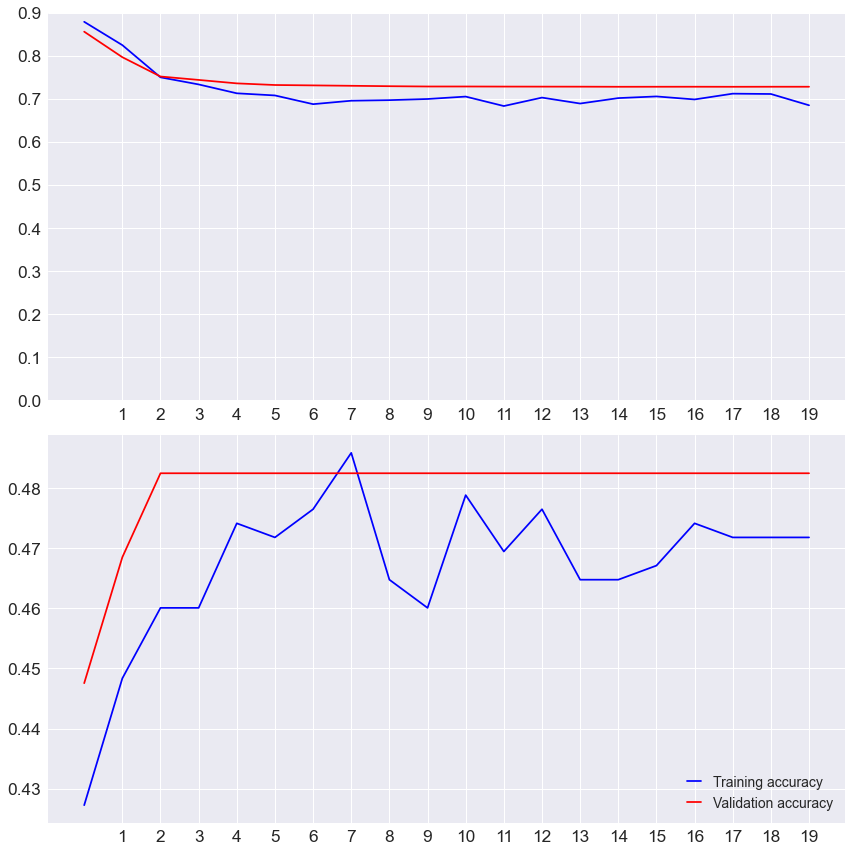

In [21]:
model_history = trainer

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model_history.history['train_loss'], color='b', label="Training loss")
ax1.plot(model_history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, NUM_EPOCHS, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model_history.history['train_acc'], color='b', label="Training accuracy")
ax2.plot(model_history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, NUM_EPOCHS, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

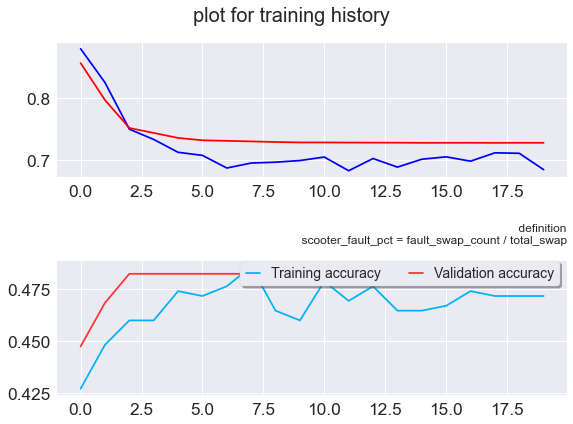

In [22]:
# # create data
# df_tmp = df_city_swap_cnt.sort_values(by=['city_fault_swap_count'], ascending=False)


# import packages
import matplotlib.pyplot as plt
import seaborn as sns


"""
note.
When plotting this secondary y axis in the same figure (ax2 = ax.twinx()),
we should do the optional settings just right after each plot!
Then we configure the overall optional settings at last.
"""
# prepare for the sub-plot: create Figure and AxesSubplot
fig, axes = plt.subplots(figsize=(8,6), nrows=2, ncols=1)
# plt.xticks(rotation=90)  # optional settings: rotate xticks for ax1
# ax2 = ax.twinx()  # special settings: add second y axis to the plot for another (line) diagram

# plot for ax1
plot1_color='#5AA0D6'
# sns.lineplot(model_history.history['train_loss'], color='b', label="Training loss", ax=axes[0])
# sns.lineplot(model_history.history['val_loss'], color='r', label="validation loss", ax=axes[0])
axes[0].plot(model_history.history['train_loss'], color='b', label="Training loss")
axes[0].plot(model_history.history['val_loss'], color='r', label="Validation loss")

# plot1 = sns.barplot(x='city_en', y='city_fault_swap_count', data=df_tmp, 
#                     ax=axes[0], # assign axis
#                     # optional settings
#                     color=plot1_color, 
#                     alpha=0.95,  # transparency
#                     label='dc-box-fault swap count'
#                    )
# # - optional settings: annotate for the diagram on ax1
# for p in plot1.patches:
#     plot1.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha='center', va='center', 
#                    xytext=(1, 8), 
#                    textcoords='offset points',
#                    color=plot1_color
#                   )
# plot1.set_ylabel("dc-box-fault swap count")  # plot1 is an 'AxesSubplot' object
# plot1.set_xlabel("city")

# plot for ax2
plot2_color='orange'
axes[1].plot(model_history.history['train_acc'], color='#00B3F4', label="Training accuracy")
axes[1].plot(model_history.history['val_acc'], color='#FF3232',label="Validation accuracy")
# plot2 = sns.lineplot(x='city_en', y='scooter_fault_pct', data=df_tmp, 
#                      ax=axes[1],  # assign axis
#                      # optional settings
#                      linestyle=':', marker='s', color=plot2_color,
#                      label='dc-box-fault swap percentage within each city'
#                     )
# # - optional settings: annotate for the diagram on ax2
# for idx_label, txt in zip(df_tmp.index, df_tmp['scooter_fault_pct']):
#     plot2.annotate('{:.2f} %'.format(float(txt)*100), # format(txt, '.4f'),
#                    (df_tmp['city_en'][idx_label], df_tmp['scooter_fault_pct'][idx_label]+0.0003),
#                    color=plot2_color,
#                   )
# plot2.set_ylabel("fault percentage within each city")  # plot2 is an 'AxesSubplot' object


# overall optional settings
# # - plotting style
plt.style.use('seaborn')
plt.grid(True)
# # - label of ticks
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
# # - range of axis
# ax.set(xlim=[0, 8], xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))
# plt.xlim([0, 68000])
# plt.ylim([0, 1.05])
# # - title
plt.suptitle("plot for training history", fontsize=20)
plt.title(
    '''
    definition
    scooter_fault_pct = fault_swap_count / total_swap
    ''', 
    loc='right'
)
# # - label / annotate the axis
# plt.xlabel("city")
# plt.ylabel("y-coordinate of the class midpoint")
# # - lots of params
params={
    'font.family': 'sans-serif', 'font.size': 12,
    'legend.fontsize': 14, 'legend.handlelength': 1,
    'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large',
    'axes.labelsize': 'x-large',
    # 'figure.figsize': (20,10), 'lines.markersize': 10,
}
plt.rcParams.update(params)
# # - legend
plt.legend(
    loc='upper right', bbox_to_anchor=(1, 1.05),       # legend location
    frameon=True, fancybox=True, shadow=True, ncol=5,  # box style
)
# # spacing
plt.tight_layout()


# need to show the plot in the last step!
plt.show()

In [19]:
# # plotting template


# # create data
# df_tmp = df_city_swap_cnt.sort_values(by=['city_fault_swap_count'], ascending=False)


# # import packages
# import matplotlib.pyplot as plt
# import seaborn as sns


# """
# note.
# When plotting this secondary y axis in the same figure (ax2 = ax.twinx()),
# we should do the optional settings just right after each plot!
# Then we configure the overall optional settings at last.
# """
# # prepare for the sub-plot: create Figure and AxesSubplot
# fig, ax = plt.subplots(figsize=(18,10))
# plt.xticks(rotation=90)  # optional settings: rotate xticks for ax1
# ax2 = ax.twinx()  # special settings: add second y axis to the plot for another (line) diagram

# # plot for ax1
# plot1_color='#5AA0D6'
# plot1 = sns.barplot(x='city_en', y='city_fault_swap_count', data=df_tmp, 
#                     ax=ax, # assign axis
#                     # optional settings
#                     color=plot1_color, 
#                     alpha=0.95,  # transparency
#                     label='dc-box-fault swap count'
#                    )
# # - optional settings: annotate for the diagram on ax1
# for p in plot1.patches:
#     plot1.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha='center', va='center', 
#                    xytext=(1, 8), 
#                    textcoords='offset points',
#                    color=plot1_color
#                   )
# plot1.set_ylabel("dc-box-fault swap count")  # plot1 is an 'AxesSubplot' object
# plot1.set_xlabel("city")
# # plot for ax2
# plot2_color='orange'
# plot2 = sns.lineplot(x='city_en', y='scooter_fault_pct', data=df_tmp, 
#                      ax=ax2,  # assign axis
#                      # optional settings
#                      linestyle=':', marker='s', color=plot2_color,
#                      label='dc-box-fault swap percentage within each city'
#                     )
# # - optional settings: annotate for the diagram on ax2
# for idx_label, txt in zip(df_tmp.index, df_tmp['scooter_fault_pct']):
#     plot2.annotate('{:.2f} %'.format(float(txt)*100), # format(txt, '.4f'),
#                    (df_tmp['city_en'][idx_label], df_tmp['scooter_fault_pct'][idx_label]+0.0003),
#                    color=plot2_color,
#                   )
# plot2.set_ylabel("fault percentage within each city")  # plot2 is an 'AxesSubplot' object


# # overall optional settings
# # # - plotting style
# plt.style.use('seaborn')
# plt.grid(True)
# # # - label of ticks
# # plt.xticks(rotation=45)
# # plt.yticks(rotation=45)
# # # - range of axis
# # ax.set(xlim=[0, 8], xticks=np.arange(1, 8),
# #        ylim=(0, 8), yticks=np.arange(1, 8))
# # plt.xlim([0, 68000])
# # plt.ylim([0, 1.05])
# # # - title
# plt.suptitle("dc-box-faults within city", fontsize=20)
# plt.title(
#     '''
#     definition
#     scooter_fault_pct = fault_swap_count / total_swap
#     ''', 
#     loc='right'
# )
# # # - label / annotate the axis
# # plt.xlabel("city")
# # plt.ylabel("y-coordinate of the class midpoint")
# # # - lots of params
# params={
#     'font.family': 'sans-serif', 'font.size': 12,
#     'legend.fontsize': 14, 'legend.handlelength': 1,
#     'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large',
#     'axes.labelsize': 'x-large',
#     # 'figure.figsize': (20,10), 'lines.markersize': 10,
# }
# plt.rcParams.update(params)
# # # - legend
# plt.legend(
#     loc='upper right', bbox_to_anchor=(1, 1.05),       # legend location
#     frameon=True, fancybox=True, shadow=True, ncol=5,  # box style
# )
# # # spacing
# plt.tight_layout()


# # need to show the plot in the last step!
# plt.show()

In [20]:
print(len(set(df_train['Age'])))
print(len(set(df_train['SibSp'])))
print(len(set(df_train['Parch'])))
print(len(set(df_train['Fare'])))

83
6
7
199
